# 机器学习（入门）探索数据集

## 研究项目：《泰坦尼克号》生还探索

### 1、序
       1912年的一天，当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”美誉的泰坦尼克号，在她的处女航中撞冰山沉入大西洋底3700米处，船上1500多人丧生。一百多年后，人们对这一场旷世海难依然充满好奇，从电影作品到考古探索，越来越多的故事与猜想。那么，这艘在上世纪初无与伦比的豪华巨轮，怎么说翻就翻了？在翻船前，除了杰克与露丝的爱情，泰坦尼克号还经历了什么？
       那么到底是什么影响了乘客的生还，透过生还数据，我们能得到什么样的结果？接下来，我会通过数据分析告诉你哪些特征会影响生存率。
### 2、数据集来源
      著名的数据分析竞赛网站Kaggle上，举行了很多数据分析比赛，其中比较著名的就有 泰坦尼克号乘客生还预测 。
      Kaggle提供的数据集中，包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。
### 3、数据字典解释
|属性	       |定义	             |值说明|
|:-|:---|:---|
|**PassengerId**|乘客编号            |
|**Survived**	|存活情况            |1-存活，0-死亡|
|**Pclass**	    |舱位等级	     |1-上层，2-中间层，3-底层|
|**Name**	    |乘客姓名	|
|**Sex**	    |性别	|
|**Age**	    |年龄	|
|**SibSp**	    |同乘的兄弟姐妹/配偶数 |
|**Parch**	    |同乘的父母/小孩数 |
|**Ticket**	    |船票编号	|
|**Fare**	    |船票价格	|
|**Cabin**	    |客舱号	|
|**Embarked**	|登船港口 |C：Cherbourg（瑟堡），Q：Queenstown（皇后镇），S：Southampton（南安普顿）|

## Question Phase 提出问题

- 探索舱室对存活率的影响
- 探索姓氏对存活率的影响
- 探索性别差异对存活率的影响
- 探索年龄大小对存活率的影响
- 探索乘客间存在家属/亲戚关系的对存活率的影响
- 探索消费能力对存活率的影响
- 探索出发港编号对存活率的影响
- 探索舱室与年龄的综合因素对存活率的影响
- 探索性别与年龄的综合因素对存活率的影响

## Wrangling Phase 数据采集与数据清理

- 导入需要的资源库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 提供漂亮的可视化工具

In [3]:
%matplotlib inline

- 采集数据

In [65]:
# 导入'titanic-data.csv'数据
titanic_df = pd.read_csv("./titanic-data.csv")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- 清理数据

In [67]:
# 过滤分析过程中缺失的数据
titanic_df.dropna(subset = ['Age', 'Embarked'], inplace = True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Expore Phase 数据探索 提炼问题

In [12]:
# 判断各个元素对存活率的影响,删除当前元素缺失值
def influence(survived, element):
    # 判断**对存活率的影响
    survived_element = titanic_data[[survived, element]].dropna()
    groupby_element = survived_element.groupby(element)
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # **的生还人数
    print("生还人数")
    print(survived_groupby_element)
    # **的总人数
    print("总人数")
    print(total_groupby_element)
    # **的生还率
    print("生还率")
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图**的生还率
    survived_rate_element.plot(kind='bar')
    plt.title(element + 'Survival rate')
    plt.xlabel(element)
    plt.ylabel(survived)
    plt.show()

In [21]:
# 判断区间元素对存活率的影响,删除当前元素缺失值
def section_influence(survived, element, lim):
    # 判断区间元素对存活率的影响
    # 分组
    def cla(n, lim):
        if n == 0:
            return 'unknown'
        return '[%d, %d)' % (lim * (n // lim), lim * (n // lim) + lim)

    survived_section = titanic_data[[survived, element]].dropna()

    section_group = pd.DataFrame({
        'element_group': [cla(section, lim) for section in survived_section[element]]
    })

    groupby_section = pd.concat([titanic_data['Survived'], section_group], axis=1)

    groupby_element = groupby_section.groupby('element_group')
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # 分组的生还人数
    print(survived_groupby_element)
    # 分组的总人数
    print(total_groupby_element)
    # 分组的生还率
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图分组的生还率
    survived_rate_element.plot(kind='bar')
    plt.title(element + 'Survival rate')
    plt.xlabel(element)
    plt.ylabel(survived)
    survived_rate_element.plot(kind='pie',subplots=True)
    plt.show()

In [14]:
# 判断双元素对存活率的影响
def double_influence(element1, element2, survived):
    # 判断**对存活率的影响
    groupby_element = titanic_data.groupby([element1, element2])[survived]
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # **的生还人数
    print("生还人数")
    print(survived_groupby_element)
    # **的总人数
    print("总人数")
    print(total_groupby_element)
    # **的生还率
    print("生还率")
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图**的生还率
    survived_rate_element.unstack().plot(kind='bar')
    plt.title(element1 + "+" + element2 + " "+ 'Survival rate')
    plt.xlabel(element1 + "+" + element2)
    plt.ylabel(survived)
    plt.show()

### 1、探索舱室对存活率的影响

生还人数
        Survived
Pclass          
1            136
2             87
3            119
总人数
        Survived
Pclass          
1            216
2            184
3            491
生还率
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


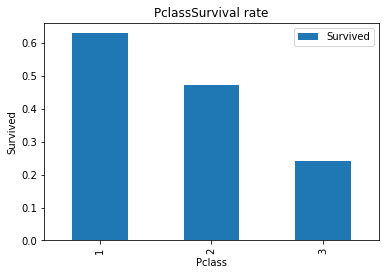

In [30]:
influence('Survived', 'Pclass')

### 2、探索姓氏对存活率的影响

生还人数
                                                 Survived
Name                                                     
Abbing, Mr. Anthony                                     0
Abbott, Mr. Rossmore Edward                             0
Abbott, Mrs. Stanton (Rosa Hunt)                        1
Abelson, Mr. Samuel                                     0
Abelson, Mrs. Samuel (Hannah Wizosky)                   1
Adahl, Mr. Mauritz Nils Martin                          0
Adams, Mr. John                                         0
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)          0
Aks, Mrs. Sam (Leah Rosen)                              1
Albimona, Mr. Nassef Cassem                             1
Alexander, Mr. William                                  0
Alhomaki, Mr. Ilmari Rudolf                             0
Ali, Mr. Ahmed                                          0
Ali, Mr. William                                        0
Allen, Miss. Elisabeth Walton                           1
Allen, Mr

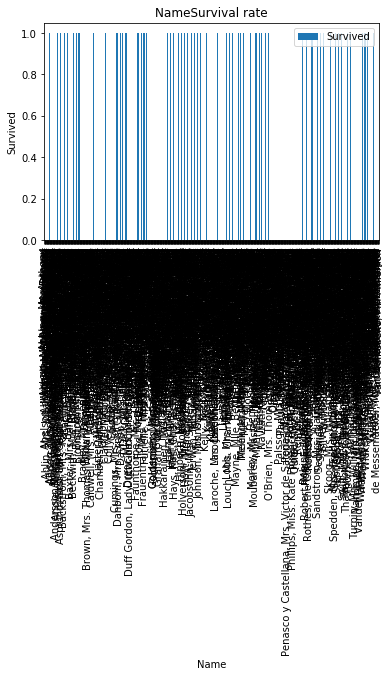

In [31]:
influence('Survived', 'Name')

### 3、探索性别差异对存活率的影响

生还人数
        Survived
Sex             
female       233
male         109
总人数
        Survived
Sex             
female       314
male         577
生还率
        Survived
Sex             
female  0.742038
male    0.188908


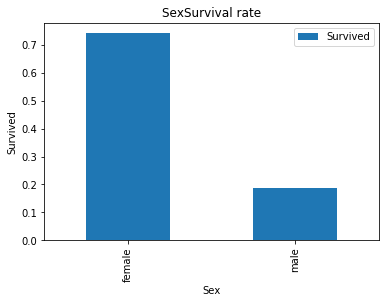

In [32]:
influence('Survived', 'Sex')

### 4、探索年龄大小对存活率的影响

               Survived
element_group          
[0, 20)              57
[20, 40)            168
[40, 60)             47
[60, 80)              7
[80, 100)             0
               Survived
element_group          
[0, 20)             164
[20, 40)            387
[40, 60)            137
[60, 80)             25
[80, 100)             1
               Survived
element_group          
[0, 20)        0.347561
[20, 40)       0.434109
[40, 60)       0.343066
[60, 80)       0.280000
[80, 100)      0.000000


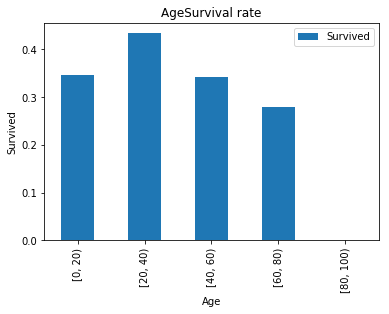

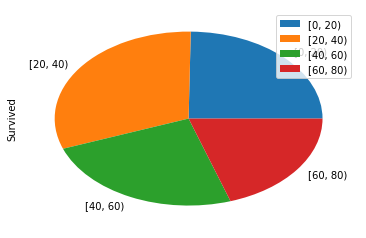

In [33]:
section_influence('Survived', 'Age', 20)

### 5、探索乘客间存在家属/亲戚关系的对存活率的影响

生还人数
Survived  SibSp
0         0        43
          1        71
          2         5
          3        17
          4        21
          5        10
          8        14
1         0        70
          1        66
          2        13
          3         4
          4         6
Name: Parch, dtype: int64
总人数
Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Parch, dtype: int64
生还率
Survived  SibSp
0         0        0.108040
          1        0.731959
          2        0.333333
          3        1.416667
          4        1.400000
          5        2.000000
          8        2.000000
1         0        0.333333
          1        0.589286
          2        1.000000
          3        1.000000
          4        2.000000
Name: Parch

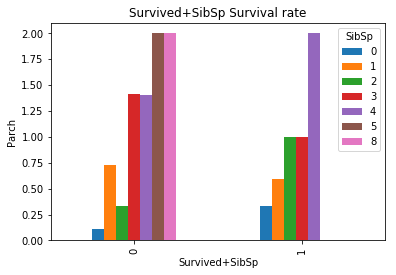

In [36]:
double_influence('Survived', 'SibSp', 'Parch')

### 探索消费能力对存活率的影响

生还人数
          Survived
Fare              
0.0000           1
4.0125           0
5.0000           0
6.2375           0
6.4375           0
6.4500           0
6.4958           0
6.7500           0
6.8583           0
6.9500           0
6.9750           1
7.0458           0
7.0500           0
7.0542           0
7.1250           0
7.1417           1
7.2250           3
7.2292           4
7.2500           1
7.3125           0
7.4958           1
7.5208           0
7.5500           1
7.6292           0
7.6500           1
7.7250           0
7.7292           0
7.7333           2
7.7375           1
7.7417           0
...            ...
80.0000          2
81.8583          1
82.1708          1
83.1583          3
83.4750          1
86.5000          3
89.1042          2
90.0000          3
91.0792          2
93.5000          2
106.4250         1
108.9000         1
110.8833         3
113.2750         2
120.0000         4
133.6500         2
134.5000         2
135.6333         2
146.5208         2
151.550

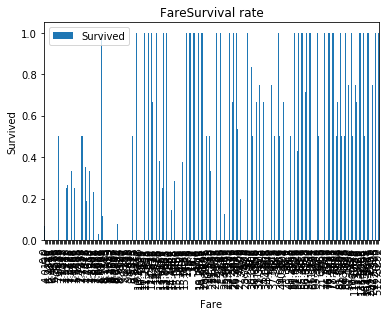

In [37]:
influence('Survived', 'Fare')

### 探索出发港编号对存活率的影响

生还人数
          Survived
Embarked          
C               93
Q               30
S              217
总人数
          Survived
Embarked          
C              168
Q               77
S              644
生还率
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


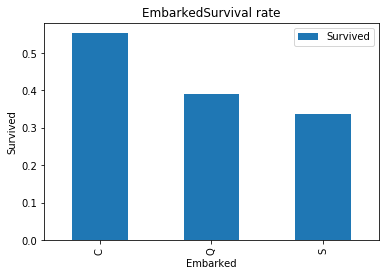

In [38]:
influence('Survived', 'Embarked')

### 探索舱室与年龄的综合因素对存活率的影响

生还人数
Survived  Pclass
0         1         2796.50
          2         3019.00
          3         7170.00
1         1         4314.92
          2         2149.83
          3         1754.92
Name: Age, dtype: float64
总人数
Survived  Pclass
0         1          64
          2          90
          3         270
1         1         122
          2          83
          3          85
Name: Age, dtype: int64
生还率
Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64


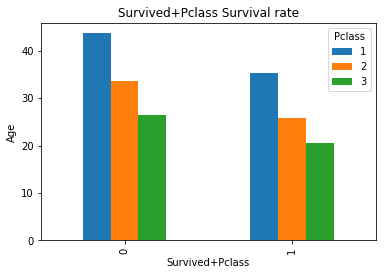

In [39]:
double_influence('Survived', 'Pclass', 'Age')

### 探索性别与年龄的综合因素对存活率的影响

生还人数
Survived  Sex   
0         female     1603.00
          male      11382.50
1         female     5683.00
          male       2536.67
Name: Age, dtype: float64
总人数
Survived  Sex   
0         female     64
          male      360
1         female    197
          male       93
Name: Age, dtype: int64
生还率
Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64


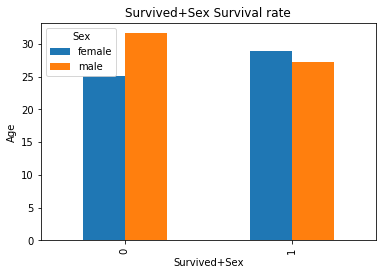

In [40]:
double_influence('Survived', 'Sex', 'Age')

## Drawing Conclusions Phase ( Make Predictions) 总结与预测

## Communication Phase 交流研究成果

泰坦尼克号的总人数大概有2200多,乘客有1300多,样本中的900左右数据量虽然不是全部人员的数据,但是就乘客而言样本数量所占比例已然接近70%,根据我们分析的结果显示舱位等级和性别对存活率有较大的影响,由于数据不完整且有缺失,分析结果并不一定正确,这种结果只是代表一个较大概率的可能性. 
除了样本所提供的因素,其他因素已知或者未知对于存活率的影响也是无法忽视,其中我认为泰坦尼克号上的800多工作人员对存活率的影响是非常大的,工作人员的行为显然可以很大程度引导乘客,目前这方面数据完全空缺,所以不能保证我们的结果是完全正确的.